<a href="https://colab.research.google.com/github/shapirka/neur_265kaileyshapiro/blob/Coding-homework/Coding_homework_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Kailey Shapiro
*Neur 265,* **April 2, 2024**

In [1]:
#2 Importing modules
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#3 Importing urls
url = 'https://raw.githubusercontent.com/shapirka/neur_265kaileyshapiro/main/spikes_left_trial1.csv'
spikes_left_trial1 = np.loadtxt(url, delimiter = ',')

url2 = 'https://raw.githubusercontent.com/shapirka/neur_265kaileyshapiro/main/spikes_right_trial1.csv'
spikes_right_trial1 = np.loadtxt(url2, delimiter = ',')

url3 = 'https://raw.githubusercontent.com/shapirka/neur_265kaileyshapiro/main/spikes_left_trial2.csv'
spikes_left_trial2 = np.loadtxt(url3, delimiter = ',')

url4 = 'https://raw.githubusercontent.com/shapirka/neur_265kaileyshapiro/main/spikes_right_trial2.csv'
spikes_right_trial2 = np.loadtxt(url4, delimiter = ',')

In [3]:
#4 Printing length
print(spikes_left_trial1.shape)
print(spikes_left_trial2.shape)
print(spikes_right_trial1.shape)
print(spikes_right_trial2.shape)

(65,)
(53,)
(45,)
(69,)


In [4]:
#6 Determining the firing rate of the neuron during each trial
rate_spikes_left1 = 65/30
rate_spikes_left2 = 53/30
rate_spikes_right1 = 45/30
rate_spikes_right2 = 69/30

print(rate_spikes_left1)
print(rate_spikes_left2)
print(rate_spikes_right1)
print(rate_spikes_right2)

2.1666666666666665
1.7666666666666666
1.5
2.3


### #7 Interpreting firing rate of the neuron
* The neuron has a higher firing rate during the right turns

Text(0.5, 1.0, 'Trial 2')

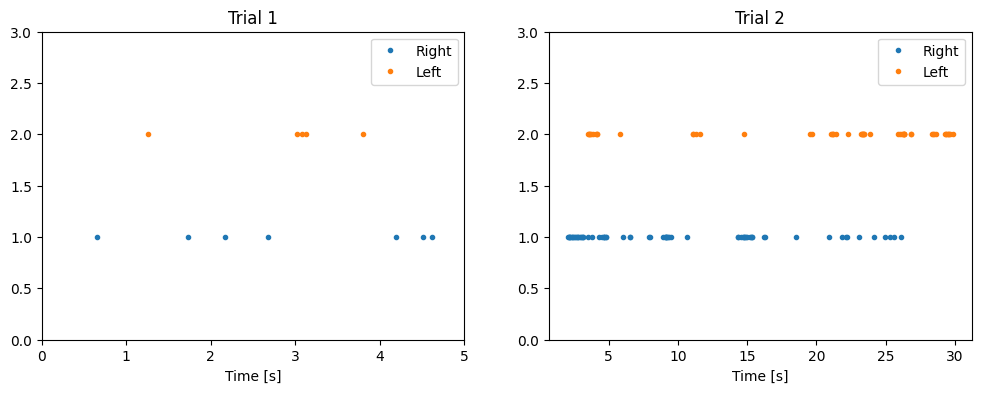

In [5]:
#8 Making plots of the spike train data
fig, ax = plt.subplots(1,2, figsize = (12,4))
ax[0].plot(spikes_right_trial1, np.ones_like(spikes_right_trial1), '.')
ax[0].plot(spikes_left_trial1, 2 * np.ones_like(spikes_left_trial1), '.')
ax[0].set_xlim([0, 5])
ax[0].set_ylim([0, 3])
ax[0].set_xlabel('Time [s]')
ax[0].legend(['Right', 'Left'])
ax[0].set_title('Trial 1')

ax[1].plot(spikes_right_trial2, np.ones_like(spikes_right_trial2), '.')
ax[1].plot(spikes_left_trial2, 2 * np.ones_like(spikes_left_trial2), '.')
#ax[1].set_xlim([0, 5])
ax[1].set_ylim([0, 3])
ax[1].set_xlabel('Time [s]')
ax[1].legend(['Right', 'Left'])
ax[1].set_title('Trial 2')

### #9 Interpreting the graphs
* The neuron seems more 'bursty' in the left turn trials than the right turn trials.
* Neither the right or left turn trials are very consistent, but when zooming in to only 5 seconds on trial 1, the left one is more sporadicly firing compared to the right trials.

In [6]:
#10 Calculting the ISI
ISI_right1 = np.diff(spikes_right_trial1)
ISI_right2 = np.diff(spikes_right_trial2)
ISI_left1 = np.diff(spikes_left_trial1)
ISI_left2 = np.diff(spikes_left_trial2)

Text(0.5, 1.0, 'ISI Left, Trial 2')

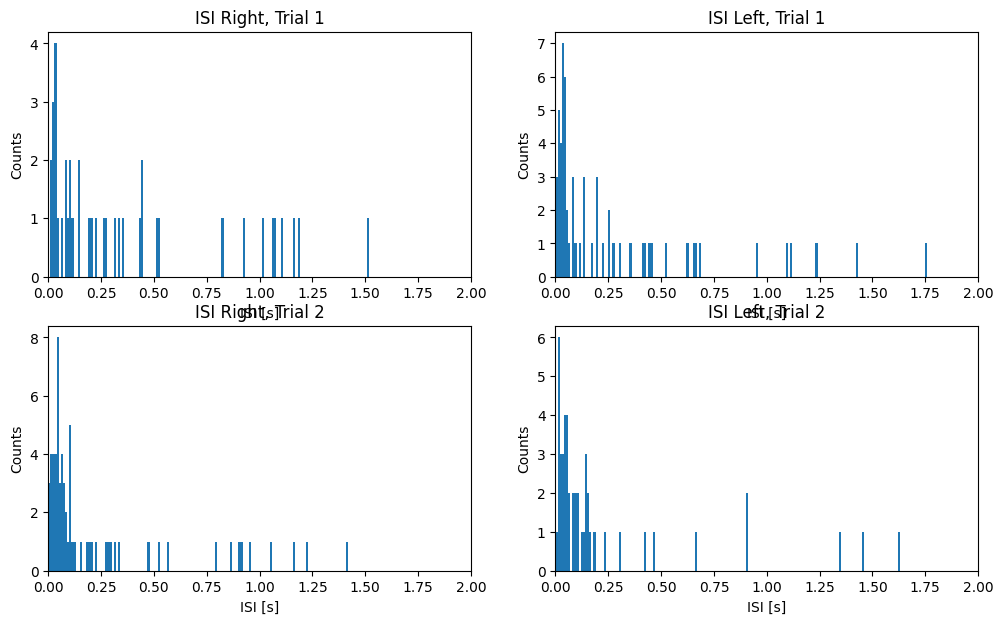

In [15]:
#11 Plotting the ISI arrays
fig, ax = plt.subplots(2,2, figsize = (12,7))
bins = np.arange(0, 2, 0.01)
ax[0,0].hist(ISI_right1, bins)
ax[0,0].set_xlim([0, 2])
ax[0,0].set_xlabel('ISI [s]')
ax[0,0].set_ylabel('Counts')
ax[0,0].set_title('ISI Right, Trial 1')

ax[1,0].hist(ISI_right2, bins)
ax[1,0].set_xlim([0, 2])
ax[1,0].set_xlabel('ISI [s]')
ax[1,0].set_ylabel('Counts')
ax[1,0].set_title('ISI Right, Trial 2')

ax[0,1].hist(ISI_left1, bins)
ax[0,1].set_xlim([0, 2])
ax[0,1].set_xlabel('ISI [s]')
ax[0,1].set_ylabel('Counts')
ax[0,1].set_title('ISI Left, Trial 1')

ax[1,1].hist(ISI_left2, bins)
ax[1,1].set_xlim([0, 2])
ax[1,1].set_xlabel('ISI [s]')
ax[1,1].set_ylabel('Counts')
ax[1,1].set_title('ISI Left, Trial 2')

### #12 Interpreting the histograms
* The neuron does tend to fire in bursts.
* It fires the most during the right, trial2 and the least during the right trial1 which is consistent with firing rates that we previously found.
* It has the most 'burstiness' during right turn trials.

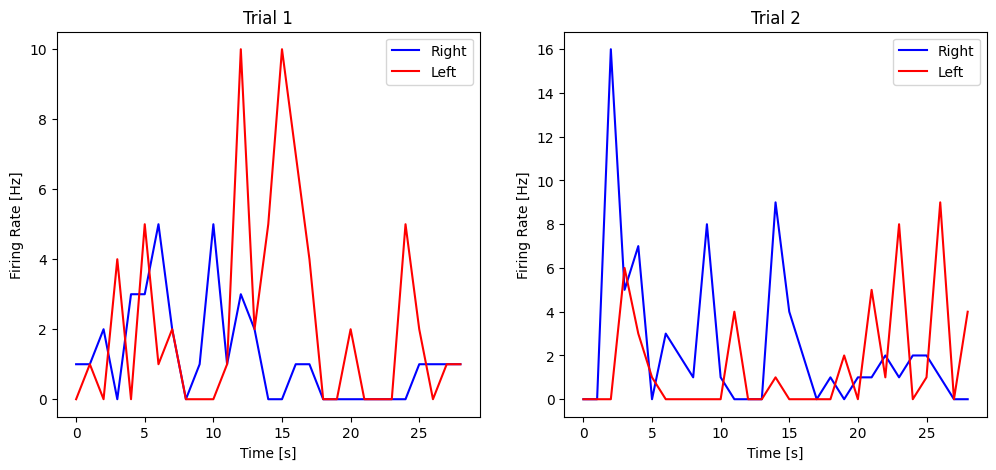

In [47]:
#13 Calculting the firing rate
fig, ax = plt.subplots(1,2, figsize = (12,5))

binsize = 1
fr_bins = np.arange(0,30,binsize)
fr_right1 = np.zeros(len(fr_bins)-1)
fr_left1 = np.zeros(len(fr_bins)-1)
fr_right2 = np.zeros(len(fr_bins)-1)
fr_left2 = np.zeros(len(fr_bins)-1)

for i in range(len(fr_bins)-1):
  spk_index = (spikes_right_trial1 > fr_bins[i]) & (spikes_right_trial1 < fr_bins[i+1])
  true_values = spikes_right_trial1[spk_index]
  fr_right1[i] = (len(true_values))/binsize

for i in range(len(fr_bins)-1):
  spk_index = (spikes_left_trial1 > fr_bins[i]) & (spikes_left_trial1 < fr_bins[i+1])
  true_values = spikes_left_trial1[spk_index]
  fr_left1[i] = (len(true_values))/binsize

for i in range(len(fr_bins)-1):
  spk_index = (spikes_right_trial2 > fr_bins[i]) & (spikes_right_trial2 < fr_bins[i+1])
  true_values = spikes_right_trial2[spk_index]
  fr_right2[i] = (len(true_values))/binsize

for i in range(len(fr_bins)-1):
  spk_index = (spikes_left_trial2 > fr_bins[i]) & (spikes_left_trial2 < fr_bins[i+1])
  true_values = spikes_left_trial2[spk_index]
  fr_left2[i] = (len(true_values))/binsize

ax[0].plot(fr_bins[:-1], fr_right1,'b')
ax[0].plot(fr_bins[:-1], fr_left1,'r')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Firing Rate [Hz]')
ax[0].set_title('Trial 1')
ax[0].legend(['Right', 'Left'])

ax[1].plot(fr_bins[:-1], fr_right2,'b')
ax[1].plot(fr_bins[:-1], fr_left2,'r')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Firing Rate [Hz]')
ax[1].set_title('Trial 2')
ax[1].legend(['Right', 'Left'])

### #14 Interpreting graph
* The different trials have different patterns
* In trial 1, when making a left turn, the neuron fires much more; but in trial 2, when making a right turn, the neuron fires more.
* Also, in trial 1, the strongest activity in the left turn is around 12-5 seconds.  In trial 2, the strongest activity occurs when the right turn neuron fires around 3-5 seconds.

# Coding Homework #7

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Create a *Code Cell* that imports relevant modules - specifically, <code>numpy as np</code>, and <code>matplotlib.pyplot as plt</code>.

3. For this assignment, you will be working with the <code>spikes_left_trial1.csv</code>, <code>spikes_right_trial1.csv</code>, <code>spikes_left_trial2</code>, and <code>spikes_right_trial2</code> files in our shared Google Drive folder. Create a *Code Cell* that imports these files as <code>numpy</code> arrays called <code>spikes_left_trial1</code>, <code>spikes_right_trial1</code>, <code>spikes_left_trial2</code>, and <code>spikes_right_trial2</code>, respectively. To do this, you should upload each file to your personal GitHub repo.

4. Create a *Code Cell* that prints the <code>length</code> of each array.

5. These data contain timestamp values for action potentials recorded from one neuron in the rat prefrontal cortex (PFC). Action potentials were recorded from tetrodes while the rat performed a task designed to test working memory - the **delayed alternation task**. During this task, rats were trained to go up the central stem of a _figure 8_ maze, and turn either left or right. Rewards (chocolate sprinkles) were placed at the end of the goal arm (the arm the rat went up after it made its turn at the end of the stem). The rat received a reward if it alternated between the two goal arms from trial to trial. In other words, the rat learned to go *left* on trial 1, and then *right* on trial 2, *left* on trial 3, etc. Between trials, the rat waited on a pedestal at the base of the maze for 30 seconds. This waiting period tested the rat's working memory because it had to keep in mind where it was going to go (left or right) when the 30 second waiting period was up. The spike timestamps in the four arrays you imported were from this 30 second waiting period. Specifically, <code>spikes_left_trial1</code> is from the waiting period before the first *left turn* trial (i.e., the rat turned left after the waiting period was up), and <code>spikes_right_trial1</code> is from the waiting period before the first *right turn* trial (i.e., the rat turned right after the waiting period was up). The <code>spikes_left_trial2</code> and <code>spikes_right_trial2</code> arrays are the same, but for the second left and right turn trials. We are interested to know whether the firing rate of this cell during the waiting period might predict which direction the rat turns on the upcoming trial.

6. In a new *Code Cell*, write an expression to determine the firing rate of this neuron during each trial (first and second left turn trials, first and second right turn trials).

7. In a new *Markdown Cell*, interpret these results - do you think this neuron fires more before left turn trials, or right turn trials?

8. In a new *Code Cell*, make two subplots, and plot the spike train data from trial 1 in your first subplot, and the spike train data from trial 2 in your second subplot. You should have dots that correspond to action potentials in two rows (one for left turn, one for right turn) in each subplot. Label your axes.

9. In a new *Markdown Cell*, interpret the graph from step 8. Does this neuron seem more "bursty", or more regular-firing, during left or right turn trials?

10. In a new *Code Cell*, calculate inter-spike interval (ISI) arrays for each of your four spike arrays using the <code>np.diff()</code> function. Make sure to create a variable name for each ISI array.

11. In a new *Code Cell*, make four histograms - one for each of your four ISI arrays. Set the bins for your histograms to start at time 0, and end at time 2 s, with a bin size equal to 0.01 s. Label your axes.

12. In a new *Markdown Cell*, interpret your histograms. Does this neuron tend to fire in "bursts"? Does it have higher "burstiness" during left or right turn trials?

13. In a new *Code Cell*, calculate the firing rate across time for each of your four arrays (trial 1 left-turn, trial 1 right-turn, trial 2 left-turn, and trial 2 right-turn). Set your time bins equal to start at 0 s, end at 30 s (the length of the waiting period), with a bin size equal to 1 s. Create two subplots, and plot the firing rate over time for each trial in each of the two subplots. For example, your first subplot should have the firing rate across time for trial 1 left-turn, and trial 1 right-turn, and your second subplot should have the firing rate across time for trial 2 left-turn, and trial 2 right-turn. Make the line for right-turn trials blue, and the line for left-turn trials red. Label your axes.

14. In a new *Markdown Cell*, interpret your graph from step 13. Does the firing rate between left and right turn trials differ at specific timepoints during the 30 s waiting period? Is the pattern different for trial 1 and trial 2?

15. Make sure to put a <code>#</code> in each *Code Cell* to describe what it does.

16. Save a copy of this notebook to your GitHub repo with the title <code>coding_homework_7.ipynb</code>.